In [13]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
sns.set()

#### Ex1
Сгенерировать случайную величину с распределением Beta(2,1)
<br>
acceptance-rejection методом на основе R[0,1] рапсределения

In [2]:
def beta(a, b, size):
    f = st.beta(a,b).pdf
    if a >= 1 and b >= 1:
        if a + b == 2:
            c = 1
        else:
            c = f(((a - 1) / (a + b - 2)))
    elif a < 1 and b < 1 or a <= 1 and b > 1:
        c = 10**10
    elif a > 1 and b <= 1:
        c = 10**10
    rv = np.array([])
    while len(rv) < size:
        y = np.random.uniform(size=size)
        probs = f(y)/c
        rv = np.hstack([rv, y[np.where(np.random.binomial(1, probs) == 1)[0]]])
    return rv[:size]

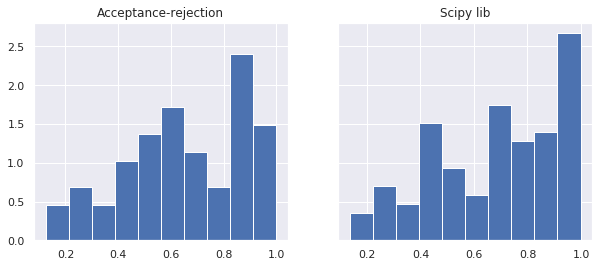

In [3]:
size = 100
_, ax = plt.subplots(1, 2, sharey='row', figsize=(10, 4))
_ = ax[0].hist(beta(2, 1, size), density=True)
_ = ax[0].set_title('Acceptance-rejection')
_ = ax[1].hist(st.beta(2, 1).rvs(size), density=True)
_ = ax[1].set_title('Scipy lib')

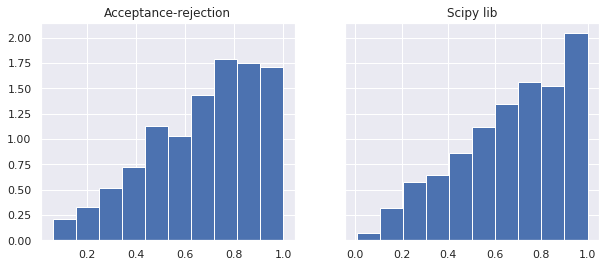

In [4]:
size = 1000
_, ax = plt.subplots(1, 2, sharey='row', figsize=(10, 4))
_ = ax[0].hist(beta(2, 1, size), density=True)
_ = ax[0].set_title('Acceptance-rejection')
_ = ax[1].hist(st.beta(2, 1).rvs(size), density=True)
_ = ax[1].set_title('Scipy lib')

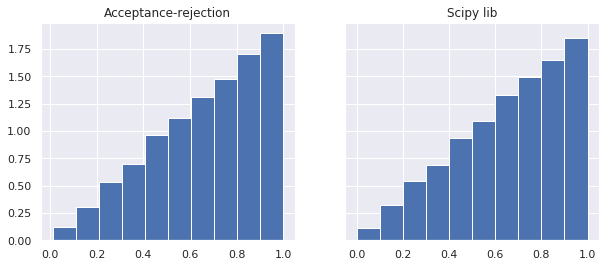

In [5]:
size = 10000
_, ax = plt.subplots(1, 2, sharey='row', figsize=(10, 4))
_ = ax[0].hist(beta(2, 1, size), density=True)
_ = ax[0].set_title('Acceptance-rejection')
_ = ax[1].hist(st.beta(2, 1).rvs(size), density=True)
_ = ax[1].set_title('Scipy lib')

#### Ex2
Сгенерировать равномерную случайную величину в изображенном множестве
<br>
а) acceptance-rehection методом
<br>
б) методом условных распределний

<img src="GraphS2-3.png" width=500 height=500/>

##### acceptance-rehection метод

In [6]:
def generate_ar(a, size):
    def constraints(x, y):
        x_condition = (x >= -a) & (x <= 2*a)
        y_condition = (y <= x + a) & (y >= x - a) & (y >= -x - a) & (y <= -x + 3*a)
        return x_condition & y_condition
    rv = np.array([[1,1]])
    while len(rv) < size:
        tmp = np.random.uniform(-a, 2*a, size=(size,2))
        rv = np.vstack([rv, tmp[constraints(tmp[:, 0], tmp[:,1])]])
    return rv[1:size]

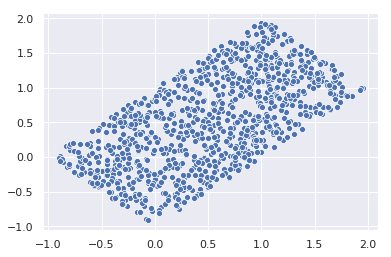

In [7]:
rv = generate_ar(1, 1000)
sns.scatterplot(rv[:,0], rv[:,1])

##### метод условных распределний

In [8]:
def generate_cd(a, size):
    rv = np.random.uniform(size=(size, 2))
    data = []
    for x, y in rv:
        x = (3*x - 1)*a
        if x <= 0:
            y = (2*y - 1)*(x+a)
        elif 0 < x <= a:
            y = x + a*(2*y - 1)
        elif x > a:
            y = (1 - 2*y)*x + a*(4*y - 1)
        data.append((x,y))
    return np.array(data)

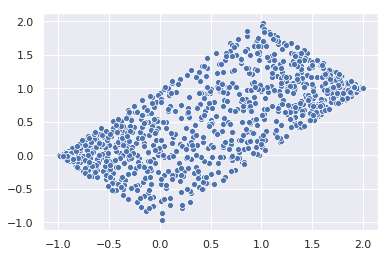

In [9]:
rv = generate_cd(1, 1000)
sns.scatterplot(rv[:,0], rv[:,1])

#### Ex3
4 курса:
 1. 15 пар
 2. 15 пар
 3. 10 пар
 4. 8 пар
 
3 аудитории

In [10]:
def check_table(table):
    for day in table:
        for lecture in day:
            if not check_lecture(lecture):
                return False
    return True

def check_lecture(lecture):
    if len(np.unique(lecture)) < 3 and np.count_nonzero(lecture) > 1:
        return False
    return True

def gen_first_sample():
    table = np.array([1]*15 + [2]*15 + [3]*10 + [4]*8 + [0]*(75-48))
    np.random.shuffle(table)
    table = table.reshape(5, 5, 3)
    while not check_table(table):
        ind1 = tuple(np.random.randint(low=[0,0,0], high=table.shape))
        ind2 = tuple(np.random.randint(low=[0,0,0], high=table.shape))
        tmp = table.copy()
        tmp[ind1], tmp[ind2] = tmp[ind2], tmp[ind1]
        if check_lecture(tmp[ind1[:-1]]) and check_lecture(tmp[ind2[:-1]]):
            table[ind1], table[ind2] = table[ind2], table[ind1]
    return table

def gen_sample(table, n_iter=1000):
    for i in range(n_iter):
        for day in range(table.shape[0]):
            for lecture in range(table.shape[1]):
                for classroom in range(table.shape[2]):
                    ind1 = (day, lecture, classroom)
                    ind2 = tuple(np.random.randint(low=[0,0,0], high=table.shape))
                    tmp = table.copy()
                    tmp[ind1], tmp[ind2] = tmp[ind2], tmp[ind1]
                    if check_lecture(tmp[ind1[:-1]]) and check_lecture(tmp[ind2[:-1]]):
                        table[ind1], table[ind2] = table[ind2], table[ind1]
    return table  

In [11]:
table = gen_first_sample()

In [15]:
count = 0
for _ in tqdm(range(1000)):
    new_table = gen_sample(table)
    if not (np.count_nonzero(new_table.sum(axis=-1), axis=-1) == 1).sum():
        count += 1
    table = new_table.copy()

100%|██████████| 1000/1000 [1:57:51<00:00,  7.07s/it]


In [19]:
count / 1000

1.0